In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

from   astropy.table     import Table

In [3]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

os.environ['CODE_ROOT'] = '{}/DESI'.format(os.environ['HOME'])

In [4]:
import pubplot

from   findfile          import findfile
from   ddp_limits        import limiting_curve_path, grab_ddplimit

In [5]:
version = 'GAMA4'
survey  = 'gama'
dryrun  = False

In [6]:
! pwd

/cosma/home/durham/dc-wils7/DESI/docs/nb


In [8]:
fpaths = sorted(glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/{}*.fits'.format(survey)))
fpaths

['/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_0.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_1.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_10.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_11.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_12.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_13.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_14.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_15.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_16.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_17.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_18.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_19.fits',
 '/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/g

In [9]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_0.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_1.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_10.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_11.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_12.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_13.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_14.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_15.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_16.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_17.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_18.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_19.fits
/cosma/home/durham/dc-wils7/data/GAMA4/ddrp_limits/gama_ddrp_limit_2.fits
/cosma/home/durham/dc-wils7/

In [10]:
fpath = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE    = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
302523,587726032230285729,138.24107544,1.3898106,19.310106,0.16764,4,G09_Y1_GN2_387,6,20.884176,19.892538,19.333622,19.098059,19.157925,0.16764,567.5885680799823,38.77016819828783,G9,0,0,-362.5006147831849,323.6456274072515,11.790034707245052,360.24777609950615,-326.16542001143983,11.395234992742399,0.5589161,19.310106,0.44947958943753863,0,3,-0.09190520741951015,0.01753129506189649,0.09878359656519924,0.22966952698049942,0.42803016150364515,2.12,-0.1626108,-0.35539678,-19.396234718313032,-19.20344873999577,-19.558845517387205,38.70634099577885,38.868951794853025,38.51355501746159,-0.061355101375443914,0.057927197356676036,0.1553697769867572,0.3231024870703393,-19.45282089873459
69566,587722983348699216,175.44771129,0.10148011,18.58092,0.03966,4,G12_Y1_AN1_013,6,19.88805,18.912779,18.466942,18.23064,18.007154,0.03966,122.68342871487285,35.443929524975005,G12,0,0,-117.63096796700349,9.365781887576258,0.20900306222365378,117.56296059674986,-10.185776712557828,0.08016226562728043,0.44583702,18.58092,0.4879333442945132,0,3,-0.14648300185863028,-0.18857932527911986,0.05072731166270636,0.036843615892893145,0.4597207166438366,2.12,-0.0384702,-0.08407919,-16.875267369696353,-16.829658379801963,-16.91373757089064,35.45618663544342,35.49465683663771,35.41057764554903,-0.16153302305915562,-0.2141912621449974,0.05519185530304549,0.05098402756866588,-16.879731913336695
78125,587722983366328655,215.75383617,0.13023629,19.602116,0.2377,4,G15_Y5_003_146,5,20.624166,19.927563,19.651224,19.482803,19.34569,0.2377,840.4516702177666,39.62256372295707,G15,0,0,-551.0657481877765,-396.766592666884,1.5434990568922213,553.8203024130299,392.91445096729393,0.9365510086970453,0.27633858,19.602116,0.059632267516942464,0,1,-0.2190692266760338,-0.0023629169224729935,-0.05778850736965971,0.12548169456615177,0.09306837533469633,2.12,-0.230569,-0.50392395,-19.73209057947138,-19.458735631904393,-19.96265958448389,39.3342062105749,39.56477521558741,39.06085126300791,-0.02611788668493953,0.250571435116781,0.19060699167726158,0.5157467248304443,-19.9804860785183
92683,587722983903854830,217.20616405,0.62545319,17.007326,0.05125,5,344631501830252544,6,18.388035,17.37754,17.003227,16.775734,16.613625,0.05125,159.94313623875726,36.01982803805585,G15,0,0,-121.17146380955684,-91.99469525940498,1.660822274210822,121.81172981152636,91.14754897357581,1.5273259905315857,0.37431335,17.007326,0.4088576076707692,0,3,-0.12670920169668512,-0.1612534548751771,0.057562876439351374,0.03841825975780236,0.3934579711737365,2.12,-0.0497125,-0.10864999,-19.020352286930294,-18.961414796943874,-19.070064788396568,36.02767841302892,36.0773909144952,35.9687409230425,-0.14825129388886404,-0.19584484735626093,0.06847358447333707,0.06933044235740235,-19.03126299496428
549995,588848899355574735,133.78634365,-0.47746874,19.069803,0.23604,4,G09_Y1_DS1_067,6,21.707098,19.921757,18.88104,18.42694,18.148039,0.23604,833.7624863325974,39.60521175459149,G9,0,0,-466.7482716603851

In [11]:
fpath = findfile(ftype='ddp', version=version, dryrun=dryrun, survey=survey)
ddp   = Table.read(fpath)
ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],STEPWISE_FAINTLIM_0P0,STEPWISE_BRIGHTLIM_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64
302523,587726032230285729,138.24107544,1.3898106,19.310106,0.16764,4,G09_Y1_GN2_387,6,20.884176,19.892538,19.333622,19.098059,19.157925,0.16764,567.5885680799823,38.77016819828783,G9,0,0,-362.5006147831849,323.6456274072515,11.790034707245052,360.24777609950615,-326.16542001143983,11.395234992742399,0.5589161,19.310106,0.44947958943753863,0,3,-0.09190520741951015,0.01753129506189649,0.09878359656519924,0.22966952698049942,0.42803016150364515,2.12,-0.1626108,-0.35539678,-19.396234718313032,-19.20344873999577,-19.558845517387205,38.70634099577885,38.868951794853025,38.51355501746159,-0.061355101375443914,0.057927197356676036,0.1553697769867572,0.3231024870703393,-19.45282089873459,0.48989296,0.2133479311066213,0.0,-7.3101063,0.005788281112758979,0.0,4203371.594730427,0 .. 0,1 .. 0,-18.71116186362166,-26.51116186362166
69566,587722983348699216,175.44771129,0.10148011,18.58092,0.03966,4,G12_Y1_AN1_013,6,19.88805,18.912779,18.466942,18.23064,18.007154,0.03966,122.68342871487285,35.443929524975005,G12,0,0,-117.63096796700349,9.365781887576258,0.20900306222365378,117.56296059674986,-10.185776712557828,0.08016226562728043,0.44583702,18.58092,0.4879333442945132,0,3,-0.14648300185863028,-0.18857932527911986,0.05072731166270636,0.036843615892893145,0.4597207166438366,2.12,-0.0384702,-0.08407919,-16.875267369696353,-16.829658379801963,-16.91373757089064,35.45618663544342,35.49465683663771,35.41057764554903,-0.16153302305915562,-0.2141912621449974,0.05519185530304549,0.05098402756866588,-16.879731913336695,1.21908,0.06917900693999858,0.0,-6.5809193,0.0019437837332501502,0.0,156653.3082278379,0 .. 0,1 .. 1,-15.608680434096446,-23.408680434096446
78125,587722983366328655,215.75383617,0.13023629,19.602116,0.2377,4,G15_Y5_003_146,5,20.624166,19.927563,19.651224,19.482803,19.34569,0.2377,840.4516702177666,39.62256372295707,G15,0,0,-551.0657481877765,-396.766592666884,1.5434990568922213,553.8203024130299,392.91445096729393,0.9365510086970453,0.27633858,19.602116,0.059632267516942464,0,1,-0.2190692266760338,-0.0023629169224729935,-0.05778850736965971,0.12548169456615177,0.09306837533469633,2.12,-0.230569,-0.50392395,-19.73209057947138,-19.458735631904393,-19.96265958448389,39.3342062105749,39.56477521558741,39.06085126300791,-0.02611788668493953,0.250571435116781,0.19060699167726158,0.5157467248304443,-19.9804860785183,0.1978836,0.26557336204152554,0.0,-7.6021156,0.006499216208630515,0.0,7836894.982863354,0 .. 0,1 .. 0,-19.261005929333038,-27.06100592933304
92683,587722983903854830,217.20616405,0.62545319,17.007326,0.05125,5,344631501830252544,6,18.388035,17.37754,17.003227,16.775734,16.613625,0.05125,159.94313623875726,36.01982803805585,G15,0,0,-121.17146380955684,-91.99469525940498,1.

In [12]:
ddp.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 121975),
             ('IMMUTABLE', 'False'),
             ('RLIM', 19.8),
             ('RMAX', 12.0),
             ('MAX_SEP', 70.0),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0190299991518259),
             ('DDP1_ZMAX', 0.2715100049972534),
             ('DDP1_VZ', 8338406.912746496),
             ('DDP1ZLIMS_NGAL', 121975),
             ('DDP1_NGAL', 50872),
             ('DDP1_DENS', 0.00610092557635135),
             ('DDP2_ZMIN', 0.0188400000333786),
             ('DDP2_ZMAX', 0.1936399936676025),
             ('DDP2_VZ', 3179460.348095798),
             ('DDP2ZLIMS_NGAL', 76273),
             ('DDP2_NGAL', 33593),
             ('DDP2_DENS', 0.01056562948492787),
             ('DDP3_ZMIN', 0.01882999949157238),
             ('DDP3_ZMAX', 0.1015100032091141),
             ('DDP3_VZ', 482216.0515798731),
             ('DDP3ZLIMS_NGAL', 20474),
             ('DDP3_NGAL', 9269),
             (

0	0	12.000	0.131	0.164	True
1	1	12.000	0.298	0.299	True
2	10	12.000	0.603	0.555	False
3	11	12.000	0.785	0.682	False
4	12	12.000	0.933	0.773	False
5	13	12.000	1.067	0.900	False
6	14	19.800	0.131	0.164	True
7	15	19.800	0.298	0.299	True
8	16	19.800	0.443	0.423	True
10	18	19.800	0.785	0.682	True
11	19	19.800	0.933	0.773	True
12	2	12.000	0.443	0.423	True
13	20	19.800	1.067	0.900	True
14	21	19.800	0.131	0.164	False
15	22	19.800	0.298	0.299	False
16	23	19.800	0.443	0.423	False
17	24	19.800	0.603	0.555	False
18	25	19.800	0.785	0.682	False
19	26	19.800	0.933	0.773	False
							FAINT: 27
20	27	19.800	1.067	0.900	False
22	4	12.000	0.785	0.682	True
23	5	12.000	0.933	0.773	True
24	6	12.000	1.067	0.900	True
							BRIGHT: 7
25	7	12.000	0.131	0.164	False
26	8	12.000	0.298	0.299	False
27	9	12.000	0.443	0.423	False


(-16.5, -22.5)

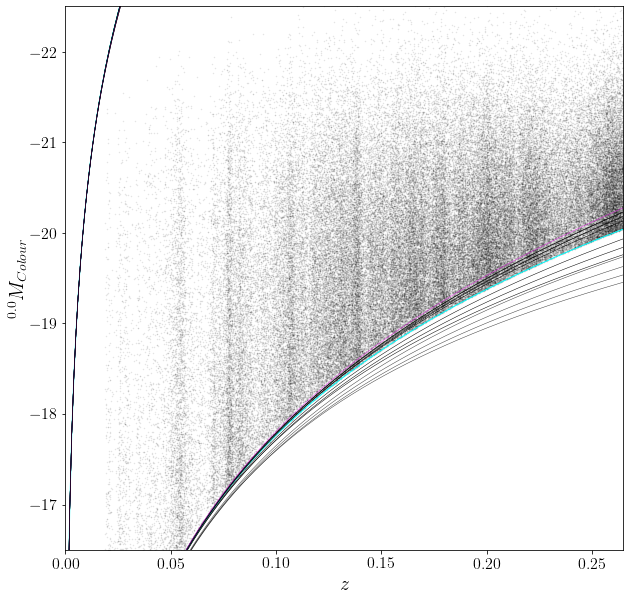

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.scatter(kE['ZGAMA'], kE['DDPMALL_0P0'], s=0.25, alpha=0.1, c='k')

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']
    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if 'COLOR' in MCOL:
        alpha = 0.75
    else:
        alpha = 1.00
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('$^{0.0}M_{Colour}$')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

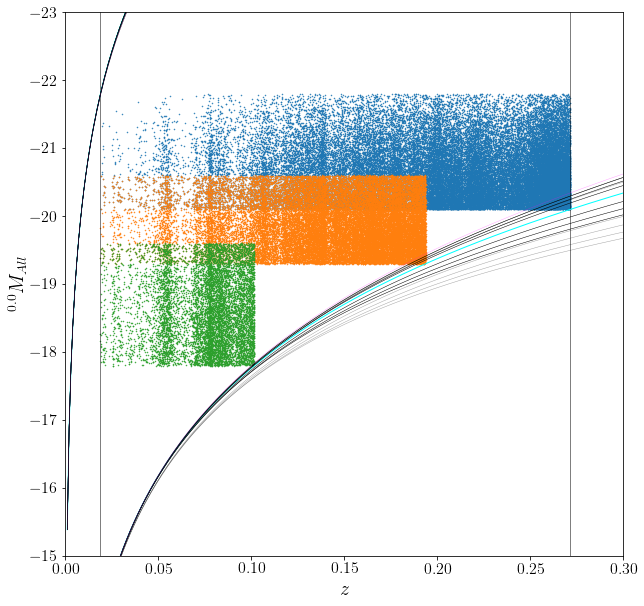

In [14]:
fig, ax   = plt.subplots(1, 1, figsize=(10,10))

colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

axes      = [ax, ax, ax]

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in ddp['DDP'].data[:,i]]
    ax.scatter(ddp['ZGAMA'][is_ddp], ddp['DDPMALL_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

axes      = [ax]
    
for ax in axes:
    ax.axvline(0.0188, c='k', lw=0.5)
    ax.axvline(0.2715, c='k', lw=0.5)
    
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]

        if 'COLOR' in MCOL:
            alpha = 0.35
        else:
            alpha = 1.0

        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1., alpha=alpha)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5, alpha=alpha)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5, alpha=alpha)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('$^{0.0}M_{All}$')
        
        ax.set_xlim(  0.0, 0.300)
        ax.set_ylim(-15.0, -23.0)

In [15]:
sorted(ddp.dtype.names)

['CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'CATAID',
 'CONSERVATIVE',
 'DDP',
 'DDPKCORR_G0P0',
 'DDPKCORR_G0P1',
 'DDPKCORR_R0P0',
 'DDPKCORR_R0P1',
 'DDPMALL_0P0',
 'DDPZLIMS',
 'DEC',
 'DELTA_DETMAG_BRIGHT',
 'DELTA_DETMAG_FAINT',
 'DETMAG',
 'DISTMOD',
 'EQ_ALL_0P0',
 'EQ_COLOR_0P0',
 'FIELD',
 'GMAG_DRED_SDSS',
 'GMR',
 'IMAG_DRED_SDSS',
 'IN_D8LUMFN',
 'KCORR_G0P0',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_R0P1',
 'LUMDIST',
 'MALL_0P0',
 'MCOLOR_0P0',
 'MQZERO_0P0',
 'NQ',
 'OBJID',
 'Q_COLOR_0P0',
 'RA',
 'REST_GMR_0P0',
 'REST_GMR_0P1',
 'REST_GMR_0P1_INDEX',
 'REST_GMR_0P1_WARN',
 'RMAG_DRED_SDSS',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'R_PETRO',
 'SPECID',
 'STEPWISE_BRIGHTLIM_0P0',
 'STEPWISE_FAINTLIM_0P0',
 'SURVEY_CLASS',
 'UMAG_DRED_SDSS',
 'VMAX',
 'ZGAMA',
 'ZMAG_DRED_SDSS',
 'ZMAX',
 'ZMAX_WARN',
 'ZMIN',
 'ZMIN_WARN',
 'ZSURV',
 'Z_THETA_QALL',
 'Z_THETA_QCOLOR',
 'Z_THETA_QZERO']

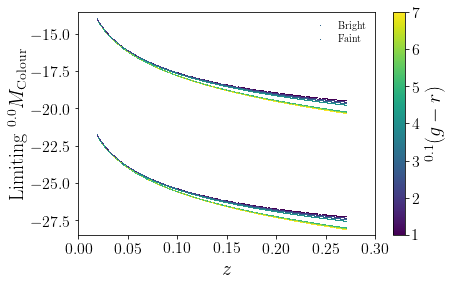

In [40]:
pl.scatter(ddp['ZSURV'],\
           ddp['STEPWISE_BRIGHTLIM_0P0'],\
           c=ddp['REST_GMR_0P1_INDEX'],\
           marker=',',\
           lw=0.0,\
           s=1,
           label='Bright')

pl.scatter(ddp['ZSURV'],\
           ddp['STEPWISE_FAINTLIM_0P0'],\
           c=ddp['REST_GMR_0P1_INDEX'],\
           marker=',',\
           lw=0.0,\
           s=1,
           label='Faint')

pl.xlim(0.0,   0.3)
pl.ylim(-28.5, -13.5)

pl.xlabel(r'$z$')
pl.ylabel(r'Limiting $^{0.0}M_{\rm Colour}$')

pl.colorbar(label='$^{0.1}(g-r)$')

pl.legend(frameon=False)

# Done.